<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week7_Day1_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
def load_local_texts(filepaths):
    corpus = []
    for path in filepaths:
        with open(path, 'r', encoding='utf-8') as f:
            text = f.read()
            start = text.find('START')
            end = text.find('*** END')
            text = text[start:end] if start != -1 and end != -1 else text
            text = re.sub(r'[^A-Za-z\s]', '', text)
            text = re.sub(r'\s+', ' ', text).strip()
            corpus.append(text)
    return corpus

# Exemple :
filepaths = ['/content/Alice.txt', '/content/Gutenberg.txt', '/content/Tangled.txt']
corpus = load_local_texts(filepaths)
# Print the first 200 characteres of each text.
for i, text in enumerate(corpus):
    print(f"\nLivre {i+1} - Extrait :\n{text[:200]}")


Livre 1 - Extrait :
START OF THE PROJECT GUTENBERG EBOOK ALICES ADVENTURES IN WONDERLAND Illustration Alices Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION Contents CHAPTER I Down the RabbitHole

Livre 2 - Extrait :
START OF THE PROJECT GUTENBERG EBOOK THROUGH THE LOOKINGGLASS Illustration THROUGH THE LOOKINGGLASS And What Alice Found There By Lewis Carroll The Millennium Fulcrum Edition DRAMATIS PERSON As arrang

Livre 3 - Extrait :
START OF THE PROJECT GUTENBERG EBOOK A TANGLED TALE Produced by Chris Curnow Carla Foust Lindy Walsh and the Online Distributed Proofreading Team at httpswwwpgdpnet Music transcribed by Linda Cantoni 


In [ ]:
start = text.find('START')
end = text.find('*** END')
text = text[start:end] if start != -1 and end != -1 else text

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
# Télécharger les ressources nécessaires
nltk.download('punkt_tab')

# Tokeniser chaque livre
tokenized_books = [word_tokenize(text) for text in corpus]

# Afficher les 150 premiers tokens pour chaque livre
for i, tokens in enumerate(tokenized_books):
    print(f"\nLivre {i+1} - 150 premiers tokens :")
    print(tokens[:150])


Livre 1 - 150 premiers tokens :
['START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'ALICES', 'ADVENTURES', 'IN', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'Contents', 'CHAPTER', 'I', 'Down', 'the', 'RabbitHole', 'CHAPTER', 'II', 'The', 'Pool', 'of', 'Tears', 'CHAPTER', 'III', 'A', 'CaucusRace', 'and', 'a', 'Long', 'Tale', 'CHAPTER', 'IV', 'The', 'Rabbit', 'Sends', 'in', 'a', 'Little', 'Bill', 'CHAPTER', 'V', 'Advice', 'from', 'a', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'and', 'Pepper', 'CHAPTER', 'VII', 'A', 'Mad', 'TeaParty', 'CHAPTER', 'VIII', 'The', 'Queens', 'CroquetGround', 'CHAPTER', 'IX', 'The', 'Mock', 'Turtles', 'Story', 'CHAPTER', 'X', 'The', 'Lobster', 'Quadrille', 'CHAPTER', 'XI', 'Who', 'Stole', 'the', 'Tarts', 'CHAPTER', 'XII', 'Alices', 'Evidence', 'CHAPTER', 'I', 'Down', 'the', 'RabbitHole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting'

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Liste des stopwords anglais
stop_words = set(stopwords.words('english'))

# Supprimer les stopwords de chaque livre
filtered_books = []
for tokens in tokenized_books:
    filtered = [word for word in tokens if word.lower() not in stop_words]
    filtered_books.append(filtered)

# ✅ Vérification : regarder si certains stopwords ont été supprimés
check_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

# Affichage
for i, filtered_tokens in enumerate(filtered_books):
    print(f"\nLivre {i+1} - Vérification des stopwords supprimés :")
    for word in check_words:
        count = filtered_tokens.count(word)
        print(f"  {word} → {count} occurrence(s)")


Livre 1 - Vérification des stopwords supprimés :
  i → 0 occurrence(s)
  me → 0 occurrence(s)
  my → 0 occurrence(s)
  myself → 0 occurrence(s)
  we → 0 occurrence(s)
  our → 0 occurrence(s)
  ours → 0 occurrence(s)
  ourselves → 0 occurrence(s)

Livre 2 - Vérification des stopwords supprimés :
  i → 0 occurrence(s)
  me → 0 occurrence(s)
  my → 0 occurrence(s)
  myself → 0 occurrence(s)
  we → 0 occurrence(s)
  our → 0 occurrence(s)
  ours → 0 occurrence(s)
  ourselves → 0 occurrence(s)

Livre 3 - Vérification des stopwords supprimés :
  i → 0 occurrence(s)
  me → 0 occurrence(s)
  my → 0 occurrence(s)
  myself → 0 occurrence(s)
  we → 0 occurrence(s)
  our → 0 occurrence(s)
  ours → 0 occurrence(s)
  ourselves → 0 occurrence(s)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import PorterStemmer

# Initialiser le stemmer
stemmer = PorterStemmer()

# Appliquer le stemming à chaque livre
stemmed_books = []
for tokens in filtered_books:
    stemmed = [stemmer.stem(word) for word in tokens]
    stemmed_books.append(stemmed)

# Afficher les 50 premiers tokens stemmés pour chaque livre
for i, stemmed_tokens in enumerate(stemmed_books):
    print(f"\nLivre {i+1} - 50 premiers stemmed tokens :")
    print(stemmed_tokens[:50])


Livre 1 - 50 premiers stemmed tokens :
['start', 'project', 'gutenberg', 'ebook', 'alic', 'adventur', 'wonderland', 'illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbithol', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrac', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparti', 'chapter', 'viii', 'queen', 'croquetground']

Livre 2 - 50 premiers stemmed tokens :
['start', 'project', 'gutenberg', 'ebook', 'lookingglass', 'illustr', 'lookingglass', 'alic', 'found', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'dramati', 'person', 'arrang', 'commenc', 'game', 'white', 'red', 'piec', 'pawn', 'pawn', 'piec', 'tweedlede', 'daisi', 'daisi', 'humpti', 'dumpti', 'unicorn', 'haigha', 'messeng', 'carpent', 'sheep', 'oyster', 'oyster', 'walru', 'w', 'queen', 'lili', 'tigerlili', 'r', 

In [ ]:
import spacy

# Charger le modèle pré-entraîné de spaCy
nlp = spacy.load("en_core_web_sm")

# Appliquer la lemmatisation sur chaque livre
lemmatized_books = []

for text in corpus:
    doc = nlp(text)  # Analyse du texte complet
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    lemmatized_books.append(lemmas)

# Afficher les 50 premiers lemmes pour chaque livre
for i, lemmas in enumerate(lemmatized_books):
    print(f"\nLivre {i+1} – 50 premiers lemmes :")
    print(lemmas[:50])



Livre 1 – 50 premiers lemmes :
['start', 'of', 'the', 'project', 'GUTENBERG', 'EBOOK', 'alices', 'ADVENTURES', 'in', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', 'the', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'content', 'chapter', 'I', 'down', 'the', 'RabbitHole', 'CHAPTER', 'II', 'the', 'Pool', 'of', 'Tears', 'CHAPTER', 'III', 'a', 'CaucusRace', 'and', 'a', 'Long', 'Tale', 'chapter', 'IV', 'the', 'Rabbit', 'send', 'in', 'a', 'Little']

Livre 2 – 50 premiers lemmes :
['start', 'of', 'the', 'project', 'GUTENBERG', 'EBOOK', 'through', 'the', 'lookingglass', 'illustration', 'through', 'the', 'lookingglass', 'and', 'what', 'Alice', 'find', 'there', 'by', 'Lewis', 'Carroll', 'the', 'Millennium', 'Fulcrum', 'Edition', 'DRAMATIS', 'person', 'as', 'arrange', 'before', 'commencement', 'of', 'game', 'WHITE', 'RED', 'piece', 'pawns', 'pawns', 'PIECES', 'Tweedledee', 'Daisy', 'Daisy', 'Humpty', 'Dumpty', 'Unicorn', 'Haigha', 'Messenger', 'Carpent

In [ ]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger_eng')

# POS tagging de chaque texte
pos_tagged_books = []
for text in corpus:
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    pos_tagged_books.append(tagged)

# Afficher les 20 premiers tags de chaque livre
for i, tagged in enumerate(pos_tagged_books):
    print(f"\nLivre {i+1} – 20 premiers POS tags :")
    for word, tag in tagged[:20]:
        print(f"{word} → {tag}")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!



Livre 1 – 20 premiers POS tags :
START → NNP
OF → IN
THE → NNP
PROJECT → NNP
GUTENBERG → NNP
EBOOK → NNP
ALICES → NNP
ADVENTURES → NNP
IN → NNP
WONDERLAND → NNP
Illustration → NNP
Alices → NNP
Adventures → NNP
in → IN
Wonderland → NNP
by → IN
Lewis → NNP
Carroll → NNP
THE → NNP
MILLENNIUM → NNP

Livre 2 – 20 premiers POS tags :
START → NNP
OF → IN
THE → NNP
PROJECT → NNP
GUTENBERG → NNP
EBOOK → NNP
THROUGH → IN
THE → NNP
LOOKINGGLASS → NNP
Illustration → NNP
THROUGH → IN
THE → NNP
LOOKINGGLASS → NNP
And → CC
What → WP
Alice → NNP
Found → VBD
There → EX
By → IN
Lewis → NNP

Livre 3 – 20 premiers POS tags :
START → NNP
OF → IN
THE → NNP
PROJECT → NNP
GUTENBERG → NNP
EBOOK → NNP
A → NNP
TANGLED → NNP
TALE → NNP
Produced → NNP
by → IN
Chris → NNP
Curnow → NNP
Carla → NNP
Foust → NNP
Lindy → NNP
Walsh → NNP
and → CC
the → DT
Online → NNP


In [ ]:
from nltk import ne_chunk
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

for i, text in enumerate(corpus):
    tokens = word_tokenize(text[:1000])
    tags = pos_tag(tokens)
    tree = ne_chunk(tags)

    print(f"\nLivre {i+1} – Entités trouvées :")
    for subtree in tree:
        if hasattr(subtree, 'label'):
            entity = " ".join(leaf[0] for leaf in subtree)
            label = subtree.label()
            print(f"{entity} → {label}")


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!



Livre 1 – Entités trouvées :
THE → ORGANIZATION
PROJECT → ORGANIZATION
Wonderland → GPE
Lewis Carroll THE → PERSON
MILLENNIUM → ORGANIZATION
RabbitHole → ORGANIZATION
Pool → ORGANIZATION
Tears → PERSON
CaucusRace → ORGANIZATION
Long Tale → ORGANIZATION
Rabbit Sends → ORGANIZATION
Bill → PERSON
Caterpillar → ORGANIZATION
Pepper → PERSON
Queens → ORGANIZATION
Mock Turtles → ORGANIZATION
Lobster Quadrille → ORGANIZATION
Tarts → ORGANIZATION
RabbitHole → ORGANIZATION

Livre 2 – Entités trouvées :
THE → ORGANIZATION
PROJECT → ORGANIZATION
THE → ORGANIZATION
LOOKINGGLASS Illustration → ORGANIZATION
THE → ORGANIZATION
LOOKINGGLASS And What Alice → ORGANIZATION
Lewis Carroll → PERSON
Millennium Fulcrum Edition → FACILITY
DRAMATIS → ORGANIZATION
WHITE → ORGANIZATION
Dumpty Unicorn Haigha Messenger Carpenter Sheep Oyster Oyster Walrus → PERSON
Tigerlily R Queen → PERSON
Oyster Oyster Crow → PERSON
Hatta Frog → PERSON
WHITE → ORGANIZATION
White Pawn → FACILITY
Tweedledum → PERSON
Tweedledee → OR

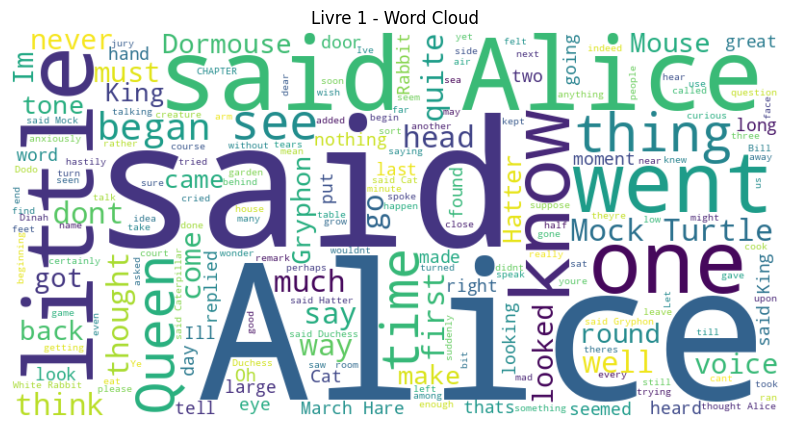

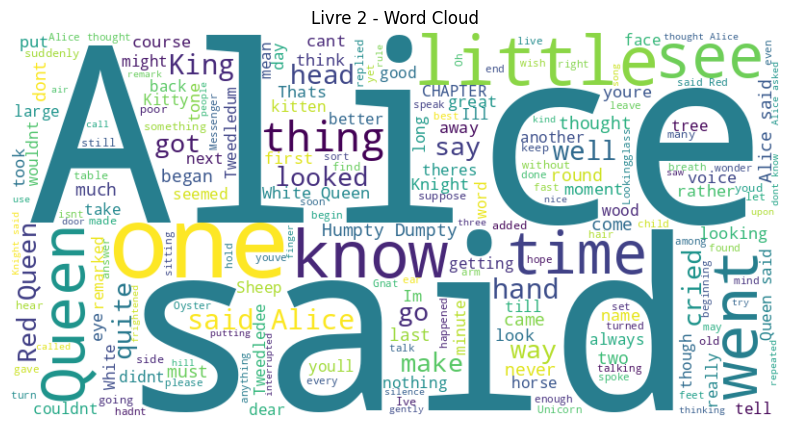

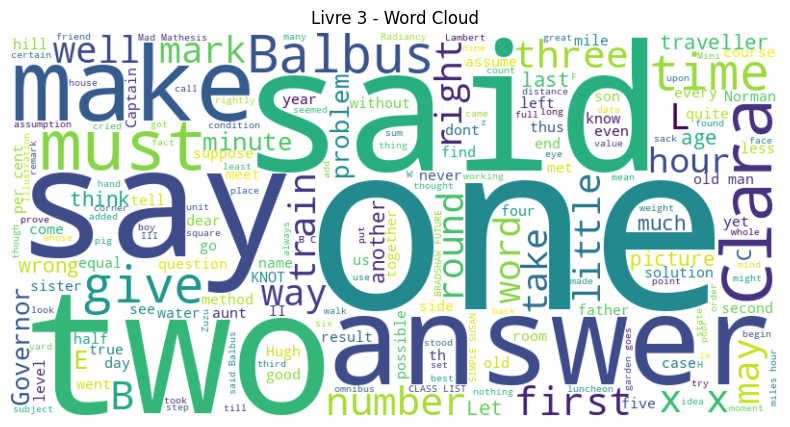

In [29]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Générer un nuage de mots pour chaque livre
for i, tokens in enumerate(filtered_books):
    # Rejoindre les mots en une seule chaîne
    text = " ".join(tokens)

    # Créer le nuage de mots
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Afficher
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Livre {i+1} - Word Cloud")
    plt.show()



Livre 1 – Top 5 mots les plus fréquents (BoW) :
Index 0 | Mot : 'the' | Occurrences : 1639
Index 1 | Mot : 'and' | Occurrences : 846
Index 2 | Mot : 'be' | Occurrences : 836
Index 3 | Mot : 'to' | Occurrences : 721
Index 4 | Mot : 'a' | Occurrences : 632


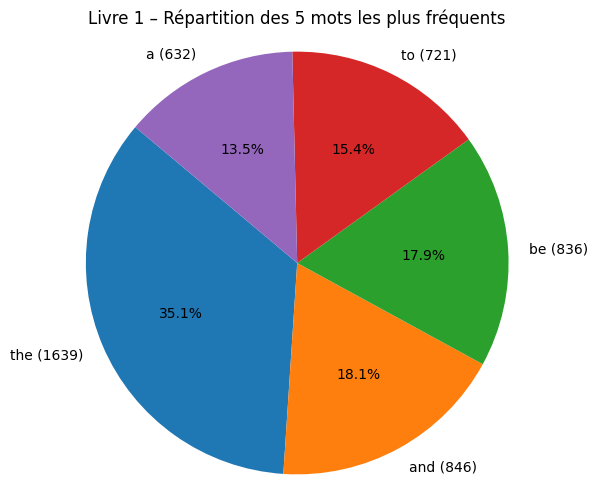


Livre 2 – Top 5 mots les plus fréquents (BoW) :
Index 0 | Mot : 'the' | Occurrences : 1594
Index 1 | Mot : 'be' | Occurrences : 906
Index 2 | Mot : 'and' | Occurrences : 855
Index 3 | Mot : 'a' | Occurrences : 758
Index 4 | Mot : 'to' | Occurrences : 734


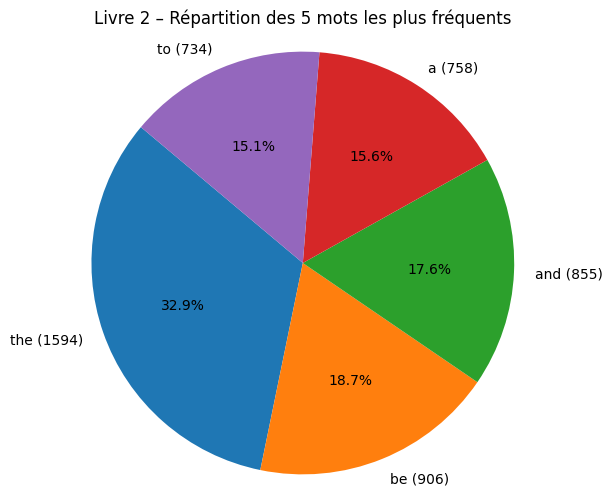


Livre 3 – Top 5 mots les plus fréquents (BoW) :
Index 0 | Mot : 'the' | Occurrences : 1730
Index 1 | Mot : 'be' | Occurrences : 985
Index 2 | Mot : 'of' | Occurrences : 768
Index 3 | Mot : 'and' | Occurrences : 758
Index 4 | Mot : 'to' | Occurrences : 612


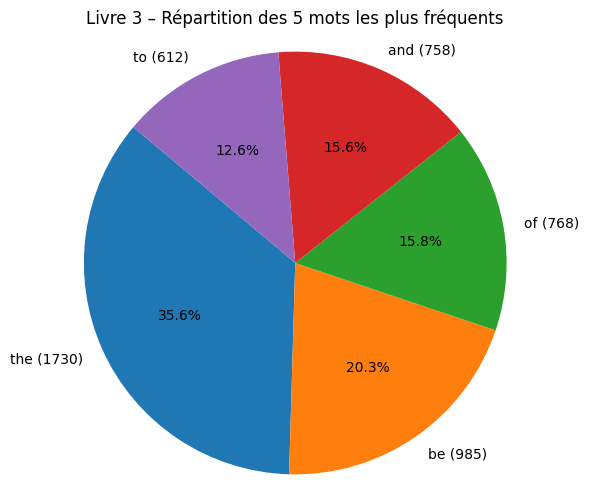

In [30]:
from collections import Counter
import matplotlib.pyplot as plt

# Analyser les livres lemmatisés
for i, lemmas in enumerate(lemmatized_books):
    # Compter les fréquences
    freq = Counter(lemmas)

    # Obtenir les 5 mots les plus fréquents
    top_5 = freq.most_common(5)

    print(f"\nLivre {i+1} – Top 5 mots les plus fréquents (BoW) :")
    for idx, (word, count) in enumerate(top_5):
        print(f"Index {idx} | Mot : '{word}' | Occurrences : {count}")

    # Afficher un diagramme circulaire
    labels = [f"{word} ({count})" for word, count in top_5]
    counts = [count for _, count in top_5]

    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Livre {i+1} – Répartition des 5 mots les plus fréquents")
    plt.axis('equal')
    plt.show()



Livre 1 – Top 5 mots (TF-IDF) :
  gryphon → 0.3474
  rabbit → 0.2843
  turtle → 0.2786
  mock → 0.2738
  hatter → 0.2690


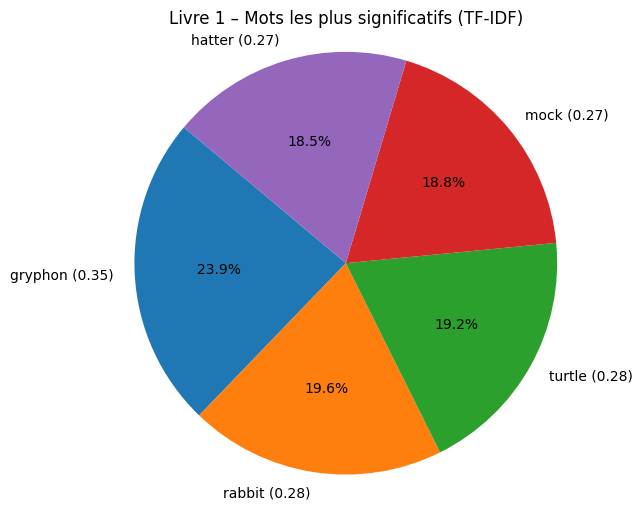


Livre 2 – Top 5 mots (TF-IDF) :
  humpty → 0.3589
  dumpty → 0.3525
  knight → 0.2827
  tweedledum → 0.2307
  horse → 0.1859


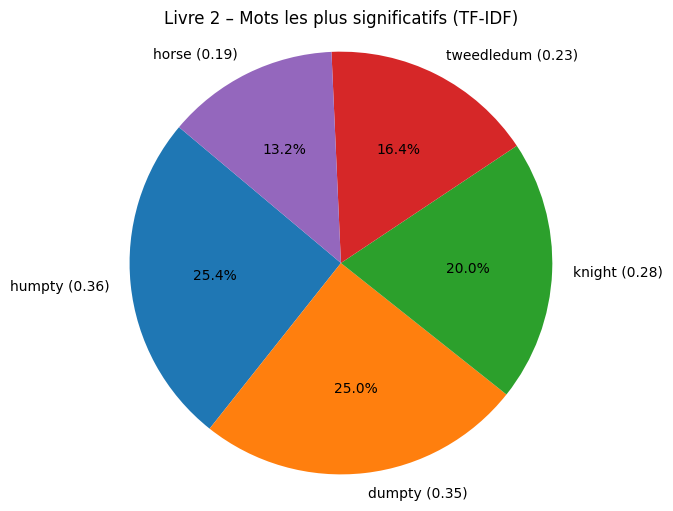


Livre 3 – Top 5 mots (TF-IDF) :
  balbus → 0.3064
  clara → 0.2507
  traveller → 0.1904
  train → 0.1836
  hugh → 0.1439


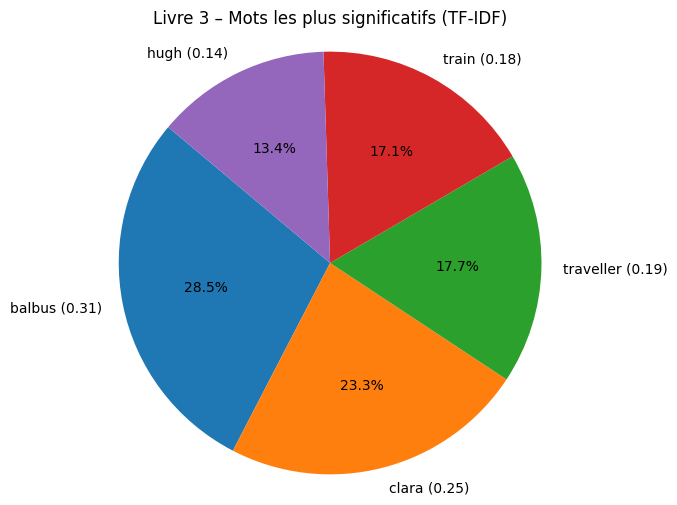

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Convertir les tokens en texte (chaîne de mots lemmatisés)
documents = [" ".join(lemmas) for lemmas in lemmatized_books]

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(min_df=1, max_df=2)
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# Afficher les 5 mots les plus pertinents (plus haut score TF-IDF) par document
for doc_idx in range(tfidf_matrix.shape[0]):
    doc_vector = tfidf_matrix[doc_idx].toarray().flatten()

    # Obtenir les indices des 5 plus grandes valeurs TF-IDF
    top_indices = doc_vector.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    top_scores = [doc_vector[i] for i in top_indices]

    print(f"\nLivre {doc_idx + 1} – Top 5 mots (TF-IDF) :")
    for i in range(5):
        print(f"  {top_words[i]} → {top_scores[i]:.4f}")

    # 🎨 Pie plot
    plt.figure(figsize=(6, 6))
    plt.pie(
        top_scores,
        labels=[f"{w} ({s:.2f})" for w, s in zip(top_words, top_scores)],
        autopct="%1.1f%%",
        startangle=140
    )
    plt.title(f"Livre {doc_idx + 1} – Mots les plus significatifs (TF-IDF)")
    plt.axis('equal')
    plt.show()
